In [6]:
import pandas as pd
df = pd.read_csv('sales_prediction.csv')

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **Prepare Training and Test Datasets**
Need data to train model, and need unseen data to measure model performance  

Use :  

70% data for Train 30% for Test seed = 42 for reproducibility  
Always split data right at the start if not having separate datasets

In [8]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

SEED=42

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

X_train.shape, X_test.shape

((5966, 11), (2557, 11))

In [10]:
X_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [11]:
y_train.head(3)

1921     117.8466
655     1230.3984
2229    4933.5780
Name: Item_Outlet_Sales, dtype: float64

## **Data Wrangling + EDA + Feature Engineering**

In [12]:
# make copy to do exploration \ modification
X_train_c = X_train.copy()

### Basic EDA

In [13]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [14]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
num_data = X_train_c.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [16]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [17]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

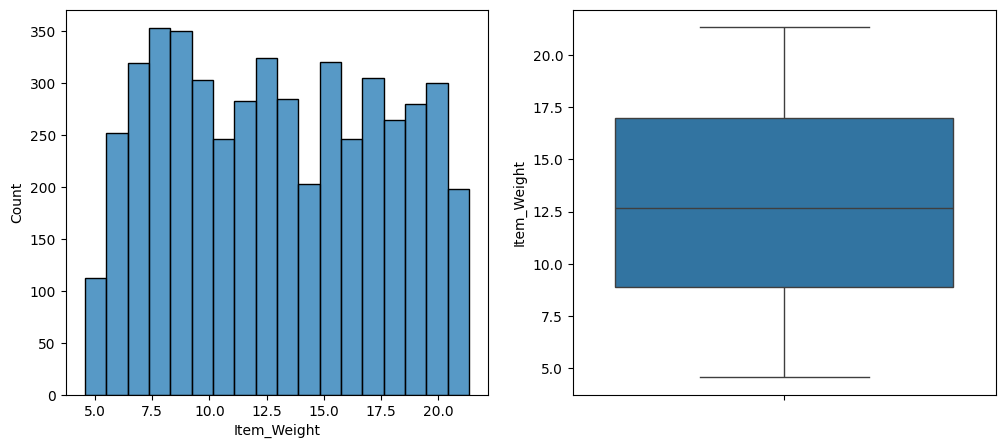

In [19]:
fig, ax =plt.subplots(1,2, figsize=(12,5))

sns.histplot(data=X_train_c,x='Item_Weight', ax=ax[0]);
sns.boxplot(data=X_train_c,y='Item_Weight', ax=ax[1]);


In [20]:
def visualize_numeric_feature(data_frame, col_name):
    # Create a figure with two subplots (1 row, 2 columns)
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # First subplot: Histogram
    sns.histplot(data=data_frame, x=col_name, ax=ax[0])
    ax[0].set_title(f'{col_name} - Histogram')
    
    # Second subplot: Boxplot
    sns.boxplot(data=data_frame, x=col_name, ax=ax[1])
    ax[1].set_title(f'{col_name} - Boxplot')
    
    plt.tight_layout()  # Adjust spacing
    plt.show()

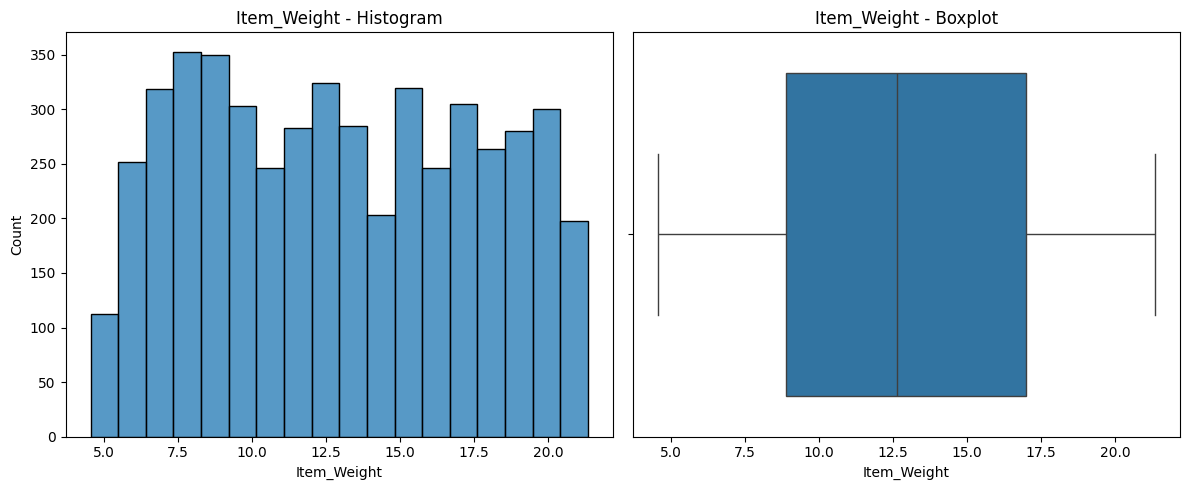

In [21]:
visualize_numeric_feature(X_train_c, 'Item_Weight')

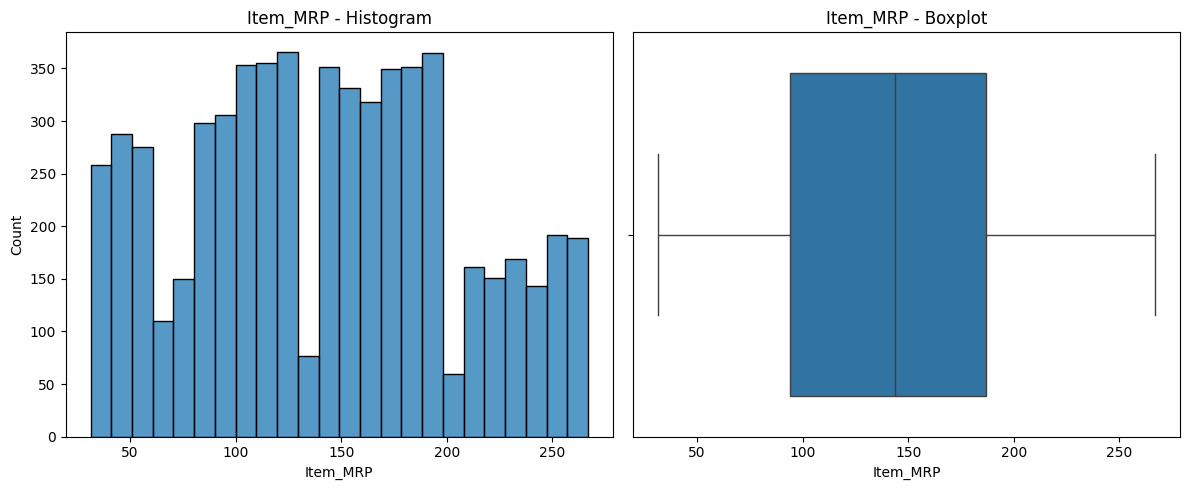

In [22]:
visualize_numeric_feature(X_train_c, 'Item_MRP')

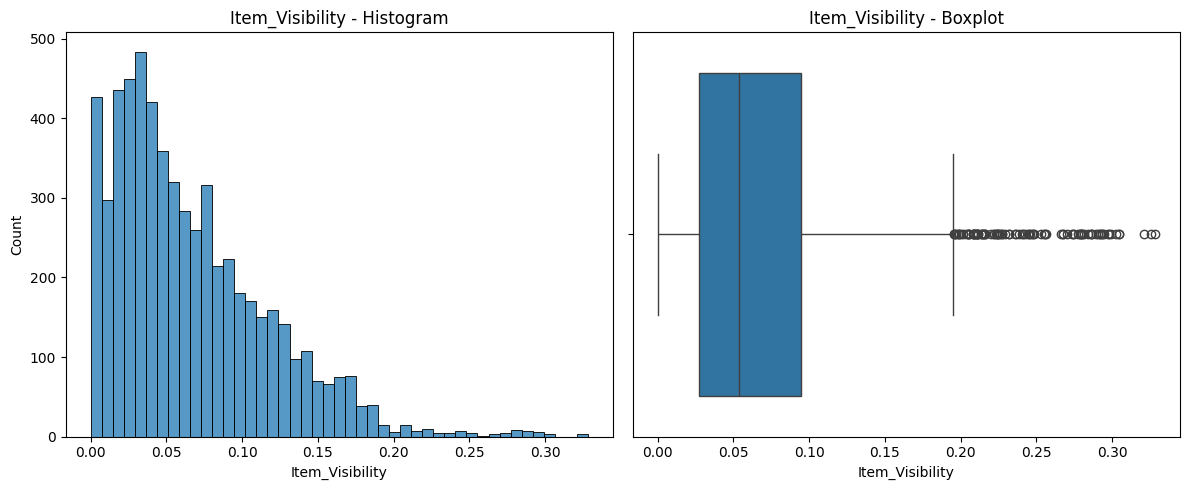

In [23]:
visualize_numeric_feature(X_train_c, 'Item_Visibility')

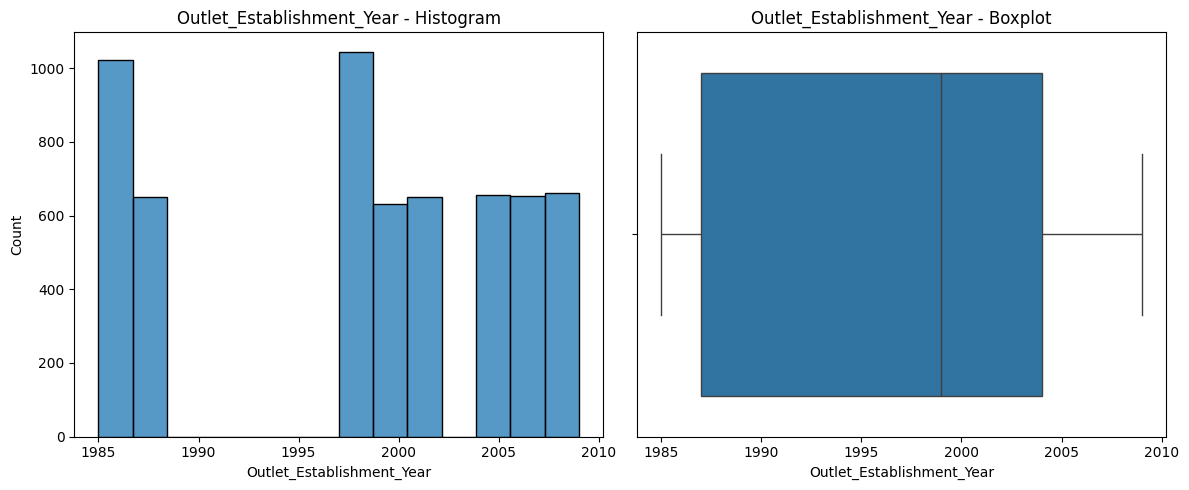

In [24]:
visualize_numeric_feature(X_train_c, 'Outlet_Establishment_Year')

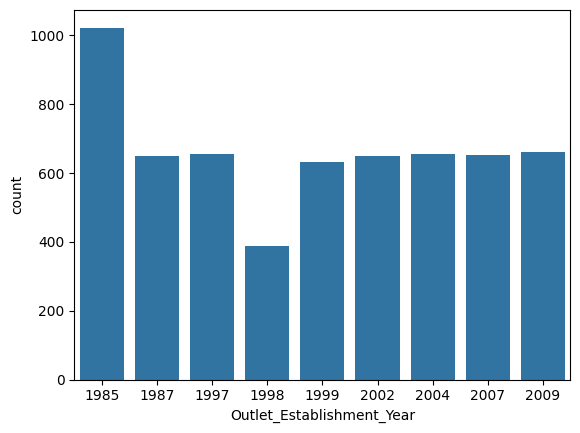

In [25]:
sns.countplot(data=X_train_c, x='Outlet_Establishment_Year');

In [26]:
cat_features = X_train_c.select_dtypes(include=['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [27]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [28]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [29]:
cat_features['Item_Identifier'].value_counts()

Item_Identifier
NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: count, Length: 1543, dtype: int64

In [30]:
cat_features['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [31]:
cat_features['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: count, dtype: int64

In [32]:
cat_features['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: count, dtype: int64

In [33]:
cat_features['Outlet_Size'].value_counts()

Outlet_Size
Medium    1960
Small     1667
High       649
Name: count, dtype: int64

In [34]:
cat_features['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: count, dtype: int64

In [35]:
cat_features['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: count, dtype: int64

## Data Wrangling + Feature Engineering

### Step 1 : Create High Level Item Types

In [36]:
X_train_c['Item_Identifier'].apply(lambda x: x[:2])

1921    FD
655     NC
2229    FD
2537    FD
3528    FD
        ..
5734    FD
5191    FD
5390    NC
860     FD
7270    NC
Name: Item_Identifier, Length: 5966, dtype: object

In [37]:
X_train_c['Item_Identifier'].apply(lambda x: x[:2]).value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [38]:
# step 1 : map item ids to item types
def creat_item_type(data_frame):
    data_frame['Item_Type']= data_frame['Item_Identifier'].str[:2]
    data_frame['Item_Type']= data_frame['Item_Type'].map({
            'FD':'FOOD',
            'NC':'Non_Consumeables',
            'DR':'Drink'
    })
    return data_frame 

In [39]:
X_train_c=creat_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,FOOD,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumeables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,FOOD,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,FOOD,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,FOOD,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


### Step 2 : Fill in missing values for Item_Weight 

In [40]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [41]:
X_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [42]:
X_train_c[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_Consumeables,12.600
6191,Non_Consumeables,8.880
1911,Non_Consumeables,19.850
135,Non_Consumeables,7.235


In [43]:
# Step 2: Fill in missing values for Item Weight
# Logic
#1st step: Use mapping of item ID weight and fill in missing values
#2nd step: If completely new item
#i.e item ID not in test \ live data use item type median (weight) and fill in missing values

ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(values= 'Item_Weight', index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items()) [:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [44]:
ITEM_TYPE_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight', index='Item_Type',
                                             aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'], ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()

dict_items([('Drink', 11.8), ('FOOD', 12.8), ('Non_Consumeables', 13.05)])

In [45]:
def impute_item_weight(data_frame):
#1st logic item id - weight
 data_frame.loc[:, 'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:, 'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
#2nd logic item type - weight if any still missing
 data_frame.loc[:, 'Item_Weight'] = data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:, 'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))

 return data_frame

In [46]:
X_train_c = impute_item_weight(X_train_c)

In [47]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Step 3 : Fill in missing values for Outlet_Size

In [48]:
X_train_c.groupby(by=['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [49]:
# Step 3: Impute missing values for Outlet Size
# Logic: Use mapping of Outlet Type mode (Outlet_Size) and fill in missing values

OUTLET_TYPE_SIZE_PIVOT = X_train_c.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type',
    aggfunc=lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

# Create a dictionary mapping Outlet_Type to Outlet_Size
OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'], OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
OUTLET_TYPE_SIZE_MAPPING


{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [50]:
def impute_outlet_size(data_frame):
    # 1st logic: Use Outlet Type mode (Outlet_Size)
    data_frame.loc[:, 'Outlet_Size'] = data_frame.loc[:, 'Outlet_Size'].fillna(
        data_frame.loc[:, 'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING)
    )
    return data_frame


In [51]:
X_train_c = impute_outlet_size(X_train_c)


In [52]:
X_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Step 4 : Standardize Item_Fat_Content categories

In [53]:
X_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [54]:
def standardize_item_fat_content(data_frame):
    data_frame['Item_Fat_Content']=data_frame['Item_Fat_Content'].replace({
        'Low Fat':'Low_Fat',
        'LF':'Low_Fat',
        'reg':'Regular',
        'low fat':'Low_Fat'
     })
    return data_frame

In [55]:
X_train_c = standardize_item_fat_content(X_train_c)
X_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat    3860
Regular    2106
Name: count, dtype: int64

### Step 5 : Correct Item fat content for non-consumables

In [56]:
X_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type         Item_Fat_Content
Drink             Low_Fat              517
                  Regular               43
FOOD              Low_Fat             2206
                  Regular             2063
Non_Consumeables  Low_Fat             1137
dtype: int64

In [57]:
X_train_c.loc[X_train_c['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content']


Series([], Name: Item_Fat_Content, dtype: object)

In [58]:
#correct item fat content for non-consumables
def correct_item_fat_content(data_frame):
    data_frame.loc[data_frame['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content'] = 'Non_Edible'
    return data_frame

In [59]:
X_train_c = correct_item_fat_content(X_train_c)
X_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type         Item_Fat_Content
Drink             Low_Fat              517
                  Regular               43
FOOD              Low_Fat             2206
                  Regular             2063
Non_Consumeables  Low_Fat             1137
dtype: int64

In [60]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


# **Prepare Dataset for ML**

In [61]:
def prepare_dataset(data_frame):

 # Step 1: Create Item Type
 data_frame = creat_item_type(data_frame)

 # Step 2: Fill in missing values for Item_Weight
 data_frame = impute_item_weight(data_frame)

 # Step 3: Impute missing values for Outlet_Size
 data_frame = impute_outlet_size(data_frame)

 # Step 4: Make Item Fat Content categories consistent
 data_frame = standardize_item_fat_content(data_frame)

 # Step 5: Correct Item fat content for non-consumables
 data_frame = correct_item_fat_content(data_frame)

 return data_frame



In [62]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [63]:
X_train = prepare_dataset(X_train)
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [64]:
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [65]:
X_test = prepare_dataset(X_test)
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Handling Categorical Data
### Expt 1 : All categorical columns - one hot encoded 

In [67]:
cat_features = X_train.select_dtypes(include=['object'])
cat_features.head()


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,FOOD,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Low_Fat,Non_Consumeables,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,FOOD,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,FOOD,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,FOOD,OUT013,High,Tier 3,Supermarket Type1


In [68]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_features)

OneHotEncoder(handle_unknown='ignore')

In [69]:
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_features.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [72]:
num_features_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_features_train.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [73]:
cat_features_train = X_train.select_dtypes(include=['object'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_features_train).toarray(), columns=ohe_feature_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [74]:
x_train_final = pd.concat([num_features_train,X_train_cat_ohe], axis=1)
x_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [75]:
final_columns = x_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [77]:
num_feats_test = X_test.select_dtypes (exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes (include=['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis=1)
X_test_final = X_test_final[final_columns]

X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Modeling

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

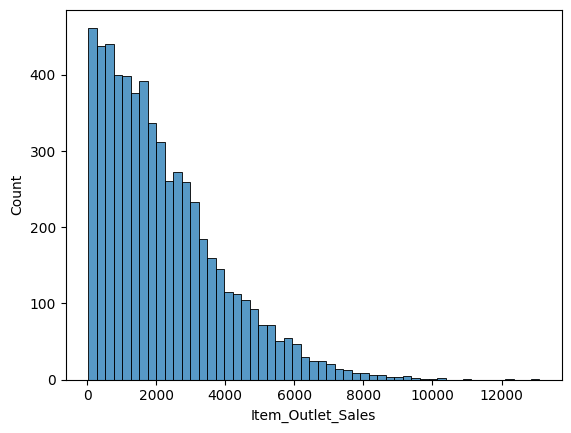

In [78]:
sns.histplot(y_train)

In [83]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np



In [90]:
def train_and_eval_model(model, X_train, y_train, cv=5):
 cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2', 'neg_root_mean_squared_error'),)
 print('Model:', model)
 r2_scores = cv_results['test_r2']
 print('R2 CV scores:', r2_scores)
 print('R2 CV scores mean / stdev:', np.mean(r2_scores), '/', np.std(r2_scores))

 rmse_scores = cv_results['test_neg_root_mean_squared_error']
 rmse_scores = [-1*score for score in rmse_scores]
 print('RMSE CV scores:', rmse_scores)
 print('RMSE CV scores mean / stdev:', np.mean(rmse_scores), '/', np.std(rmse_scores))

In [93]:
rf = RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf, X_train=x_train_final, y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.57180617 0.52721153 0.54237015 0.5525869  0.51622458]
R2 CV scores mean / stdev: 0.5420398640857302 / 0.019409743250955746
RMSE CV scores: [1102.524753140672, 1167.9828352151392, 1181.1734851314827, 1156.5435055401338, 1207.0247905221004]
RMSE CV scores mean / stdev: 1163.0498739099055 / 34.61853767995633


In [94]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb, X_train=x_train_final, y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58388983 0.54033287 0.54755752 0.58223783 0.54716116]
R2 CV scores mean / stdev: 0.560235840722721 / 0.018822404148431414
RMSE CV scores: [1086.8567589000188, 1151.6612301389123, 1174.459929973874, 1117.5634249975221, 1167.7936944145083]
RMSE CV scores mean / stdev: 1139.667007684967 / 32.9332964168704


In [95]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr, X_train=x_train_final, y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.5722618  0.56124852 0.54216909 0.58442259 0.52471549]
R2 CV scores mean / stdev: 0.5569634948570625 / 0.021284782110308577
RMSE CV scores: [1101.938022179983, 1125.1549127000342, 1181.4329294127963, 1114.637349022773, 1196.38544495

In [96]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, X_train=x_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 29
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 29
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

## Handling Categorical Data
### Expt 2 : All categorical columns - Native Handling

In [103]:
if 'Item_Identifier' in X_train_c.columns:
    X_train_c = X_train_c.drop(columns='Item_Identifier')

cat_cols = X_train_c.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train_c.select_dtypes(exclude=['object']).columns.tolist()


cat_cols, num_cols


(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [104]:
X_train_c[cat_cols] = X_train_c[cat_cols].astype('category')
n_categorical_features = len(cat_cols)
n_nymerical_features = len (num_cols)
X_train_c = X_train_c[cat_cols+num_cols]

X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                5966 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.1 KB


In [119]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline
import numpy as np

# Ensure correct encoding of categorical columns with OrdinalEncoder
column_transformer = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        make_column_selector(dtype_include="category"),  # Select categorical columns of type 'category'
    ),
    remainder="passthrough",  # Keep numerical columns as is
)

# Create a pipeline with column transformer and the model
hgb_pipeline = Pipeline(
    steps=[
        ("preprocessor", column_transformer),
        (
            "model",
            HistGradientBoostingRegressor(
                random_state=42, 
                categorical_features='from_dtype'  # Let the model infer categorical features
            ),
        ),
    ]
)

# Check the data types of the columns before training
print("Column Types before Transformation:", X_train_c.dtypes)

# Fit the model and print the training score
def train_and_eval_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    print(f"Model Training Score: {score}")

# Call the function with the corrected syntax
train_and_eval_model(model=hgb_pipeline, X_train=X_train_c, y_train=y_train)

# After fitting the model, check if all features are correctly encoded
print("Transformed Data Types after Encoding:", X_train_c.dtypes)


Column Types before Transformation: Item_Fat_Content             category
Item_Type                    category
Outlet_Identifier            category
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Weight                   float64
Item_Visibility               float64
Item_MRP                      float64
Outlet_Establishment_Year       int64
dtype: object
Model Training Score: 0.7348346765479471
Transformed Data Types after Encoding: Item_Fat_Content             category
Item_Type                    category
Outlet_Identifier            category
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Weight                   float64
Item_Visibility               float64
Item_MRP                      float64
Outlet_Establishment_Year       int64
dtype: object


In [121]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, X_train=X_train_c, y_train=y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 10
[LightGBM] [Info] Start training from score 2204.882521
Model Training Score: 0.7411917949390021


## Handling Categorical Data
### Expt 3 : No Item Idetifier - One hot encoded

In [122]:
cat_feats = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

In [125]:
num_feats_train = X_train.select_dtypes (exclude=['object']).reset_index(drop=True)
cat_feats_train = X_train.select_dtypes (include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)

x_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [126]:
x_train_final.shape

(5966, 1572)

In [124]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model Training Score: 0.644701057278154


In [127]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model Training Score: 0.8730716943567627


In [128]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb, X_train=x_train_final, y_train=y_train)

Model Training Score: 0.7338239051376788


In [129]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr, X_train=X_train_final, y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 29
[LightGBM] [Info] Start training from score 2204.882521
Model Training Score: 0.7334535854396911


## Handling Categorical Data
### Expt 4 : Item Identifier - feature hashed,rest categorical-one hot encoded

In [131]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

# Set hash vector size
hash_vector_size = 50

# Initialize the FeatureHasher
fh = FeatureHasher(n_features=hash_vector_size, input_type='string')

# Transform the `Item_Identifier` into hashed features
hashed_array = fh.transform(X_train['Item_Identifier'].apply(lambda x: [x])).toarray()

# Convert the hashed features into a DataFrame
hashed_df = pd.DataFrame(hashed_array, columns=['H' + str(i) for i in range(hash_vector_size)])

# Check the first few rows of the hashed DataFrame
print(hashed_df.head())


    H0   H1   H2   H3   H4   H5   H6   H7   H8   H9  ...  H40  H41  H42  H43  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   H44  H45  H46  H47  H48  H49  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 50 columns]


In [133]:
cat_feats = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier']) 
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

In [135]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train = X_train.select_dtypes (include=['object']).drop(columns=['Item_Identifier'])
X_train_final = pd.concat([num_feats_train, hashed_df, X_train_cat_ohe], axis=1)
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [136]:
x_train_final.shape

(5966, 1572)

In [137]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb, X_train=X_train_final, y_train=y_train)

Model Training Score: 0.6424549087650671


In [138]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr, X_train=X_train_final, y_train=y_train)

Model Training Score: 0.8459955791338055


In [139]:
X_test.shape

(2557, 11)

In [142]:
# Transform the `Item_Identifier` column in the test set
hashed_test_df = pd.DataFrame(
    fh.transform(X_test['Item_Identifier'].apply(lambda x: [x])).toarray(),
    columns=['H' + str(i) for i in range(hash_vector_size)]
)

# Select numerical features
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)

# Select categorical features excluding 'Item_Identifier'
cat_feats_test = X_test.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])

# One-hot encode the categorical features
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)

# Concatenate numerical features, hashed features, and one-hot encoded categorical features
X_test_final = pd.concat([num_feats_test, hashed_test_df, X_test_cat_ohe], axis=1)

# Display the first few rows of the final test DataFrame
X_test_final.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,-1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [143]:
X_test_final.shape

(2557, 79)

In [144]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=SEED)
xgr.fit(X_train_final,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [148]:
y_predict = xgr.predict(X_test_final)

In [149]:
from sklearn.metrics import r2_score,mean_squared_error

In [150]:
print('R2 Score:',r2_score(y_test, y_predict))
print('RMSE Score:', mean_squared_error(y_test,y_predict,squared=False))

R2 Score: 0.539935338662723
RMSE Score: 1135.1819847819304


c:\Users\rambh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


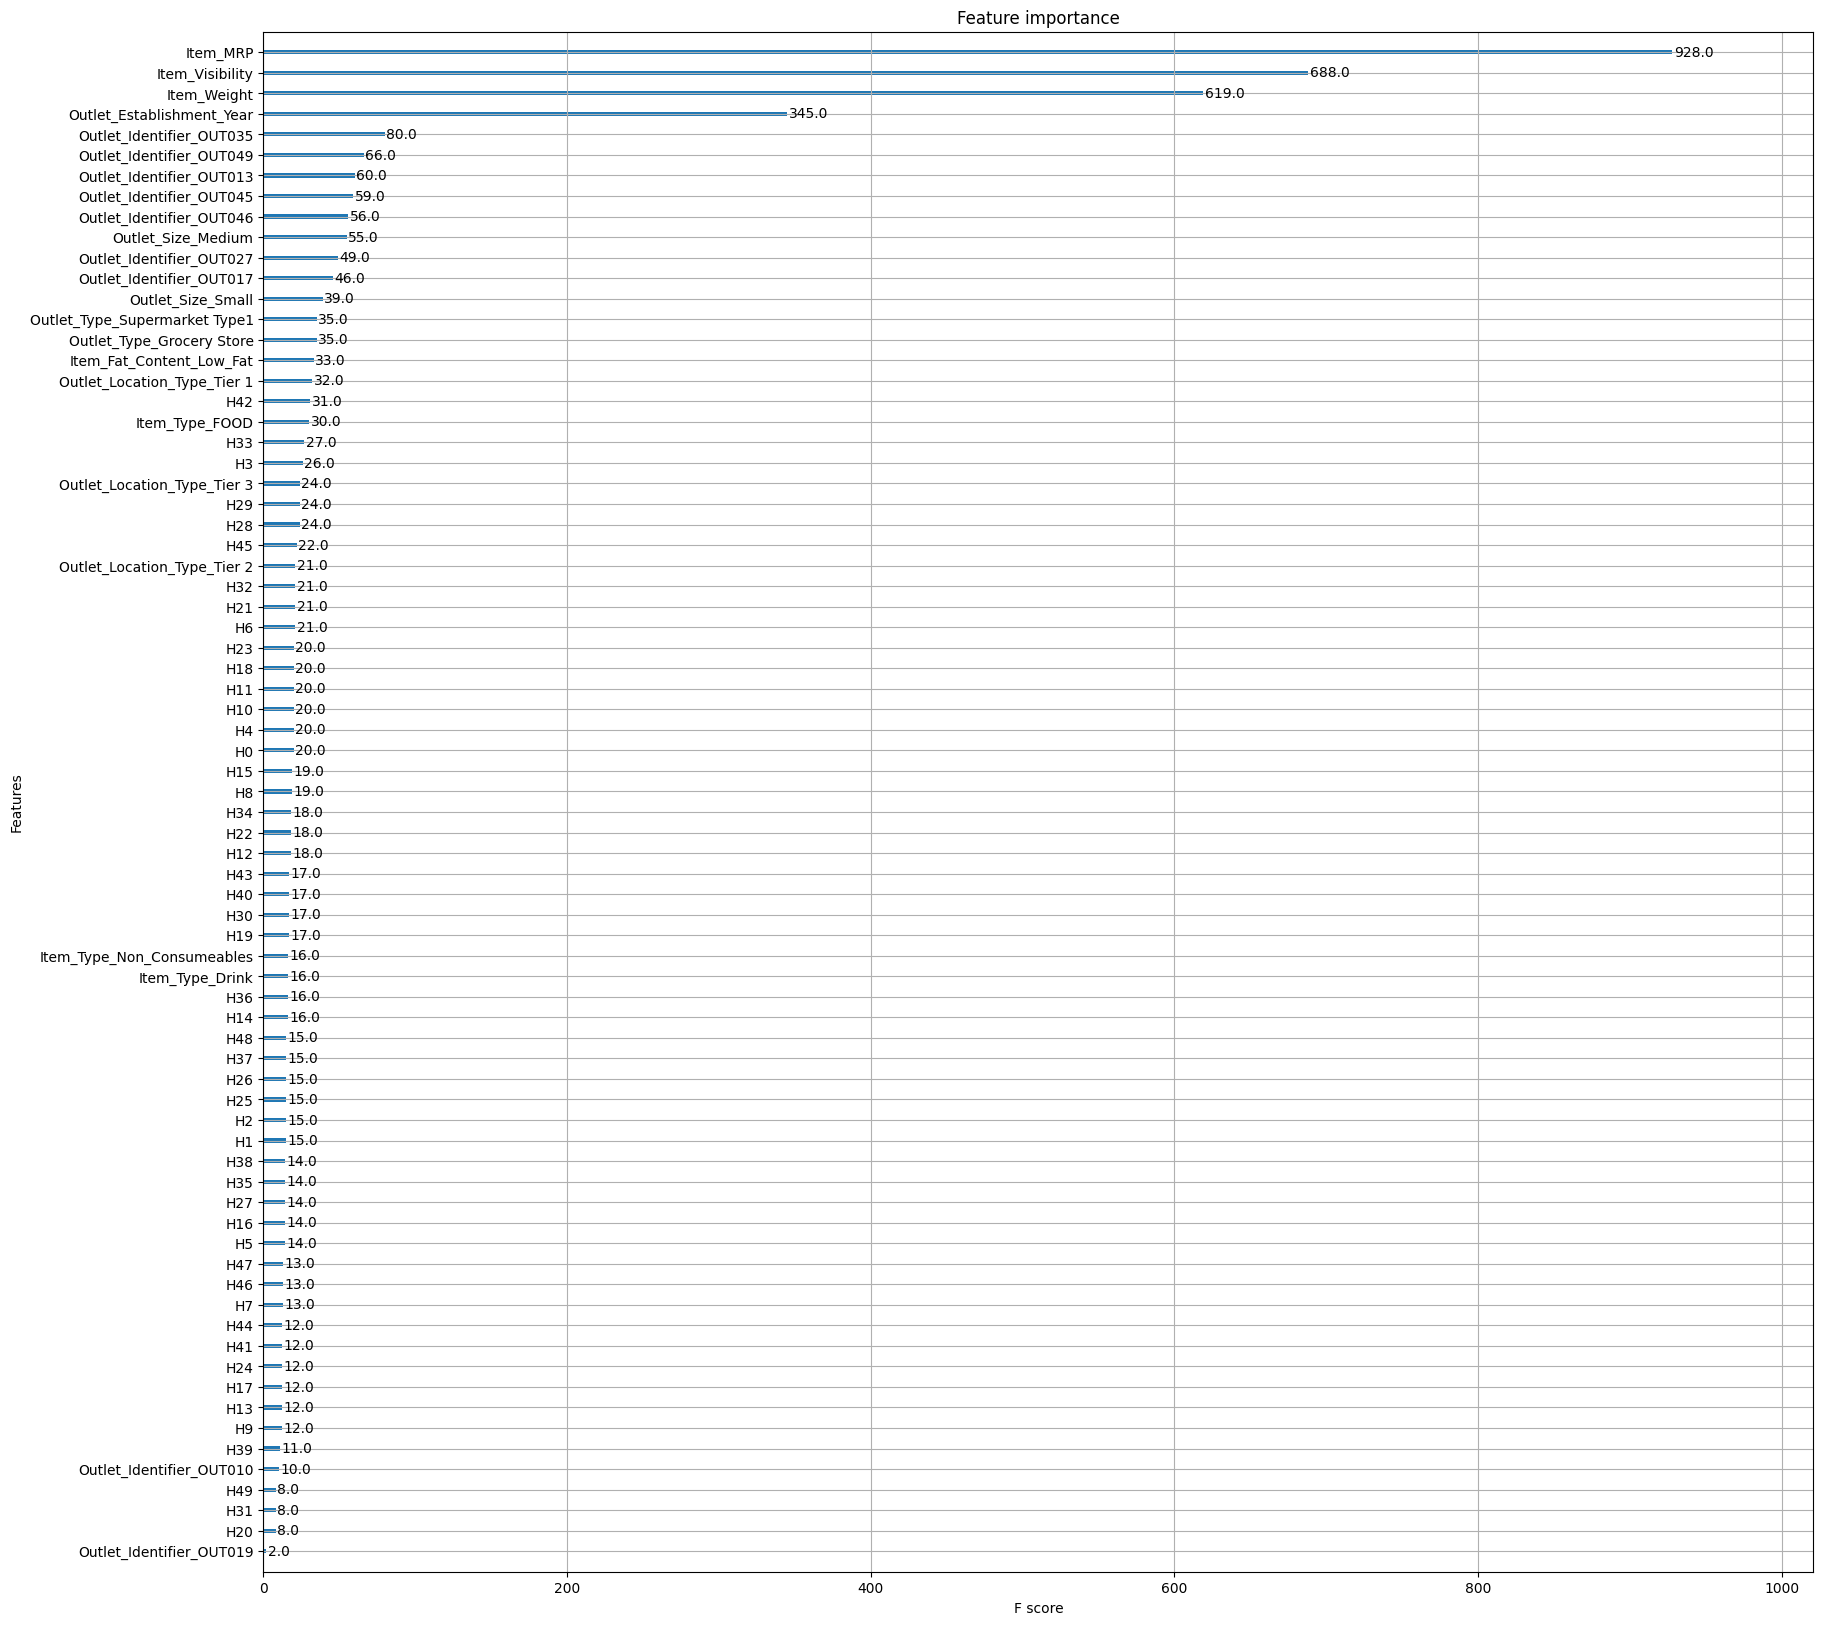

In [161]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Use plt.subplots() to create a figure and axes
fig, ax = plt.subplots(1, 1, figsize=(20,20 ))  # Note: Changed from subplot to subplots
plot_importance(xgr, ax=ax)  # Use the axes `ax` for the plot
plt.show()  # Display the plot


feature hashing  
weight of evidence  
target mean encoding  
embeddings  
if categorical featur is ordinal e.g size [small,med ,large] => label encoding 

